Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
data = pd.read_csv('41_short_test_how_much_epochs.csv')
runs = [f'epoch_{ep:02}' for ep in [0, 1, 2, 4, 8, 16, 26, 38, 49]]

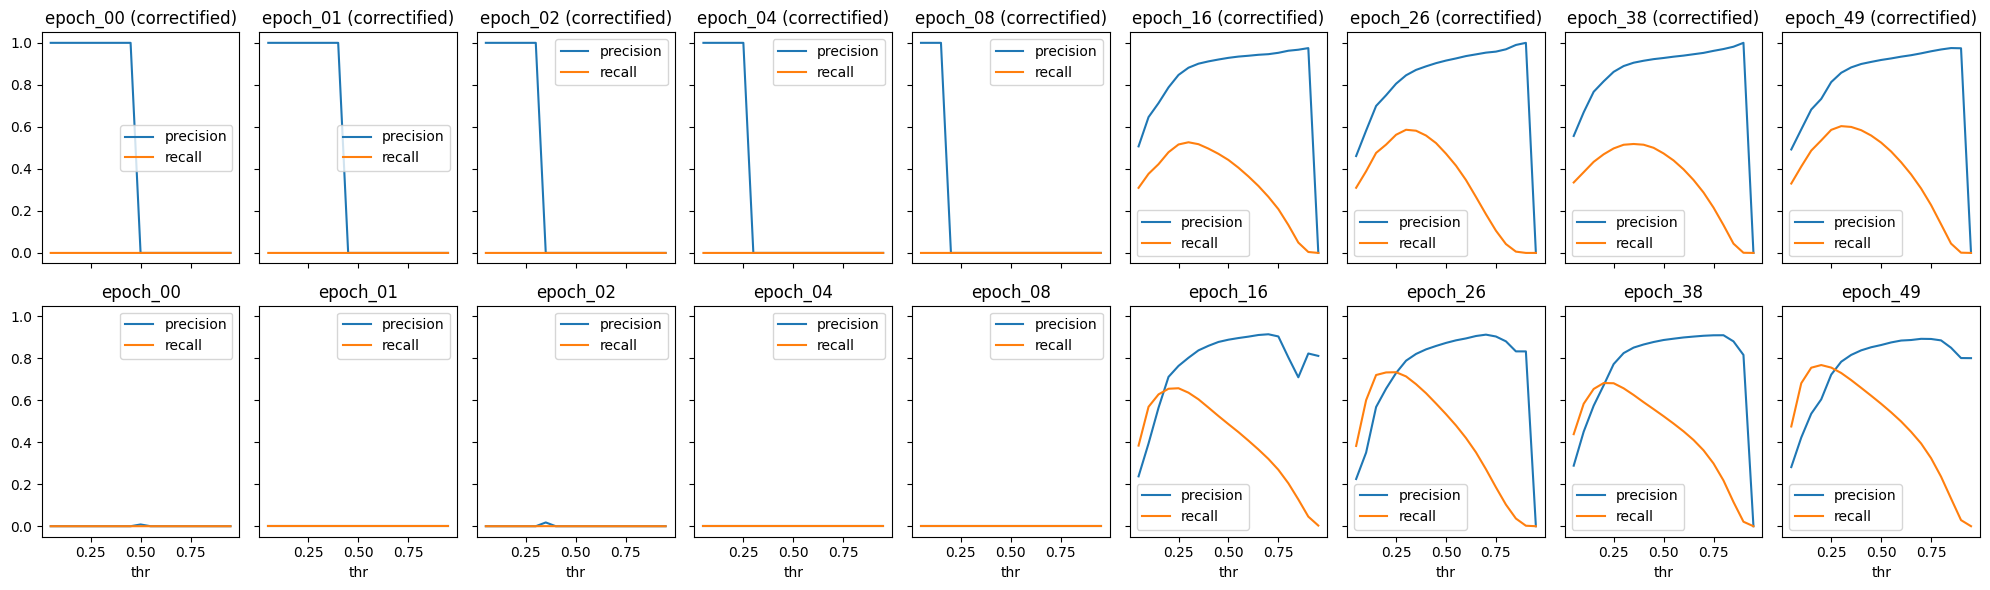

In [45]:
_, axs = plt.subplots(2, len(runs), figsize=(20, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

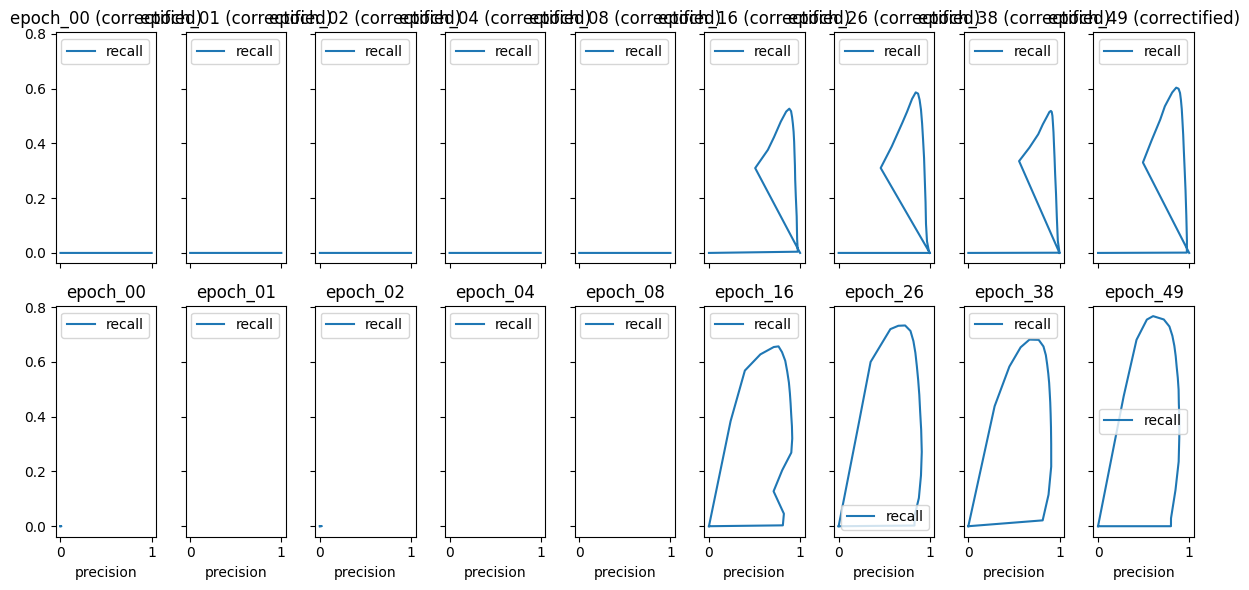

In [46]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['precision', 'recall']].set_index('precision').plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

In [47]:
data['f1'] = (2 * data['precision'] * data['recall']) / (data['precision'] + data['recall'])

In [48]:
data

,run,correctify,thr,precision,recall,f1
0,epoch_00,True,0.00,1.000000,0.000010,0.000020
1,epoch_00,True,0.05,1.000000,0.000010,0.000020
2,epoch_00,True,0.10,1.000000,0.000010,0.000020
3,epoch_00,True,0.15,1.000000,0.000010,0.000020
4,epoch_00,True,0.20,1.000000,0.000010,0.000020
...,...,...,...,...,...,...
373,epoch_49,False,0.80,0.884510,0.235852,0.372403
374,epoch_49,False,0.85,0.849539,0.131876,0.228311
375,epoch_49,False,0.90,0.800455,0.029013,0.055996
376,epoch_49,False,0.95,0.800000,0.000041,0.000082


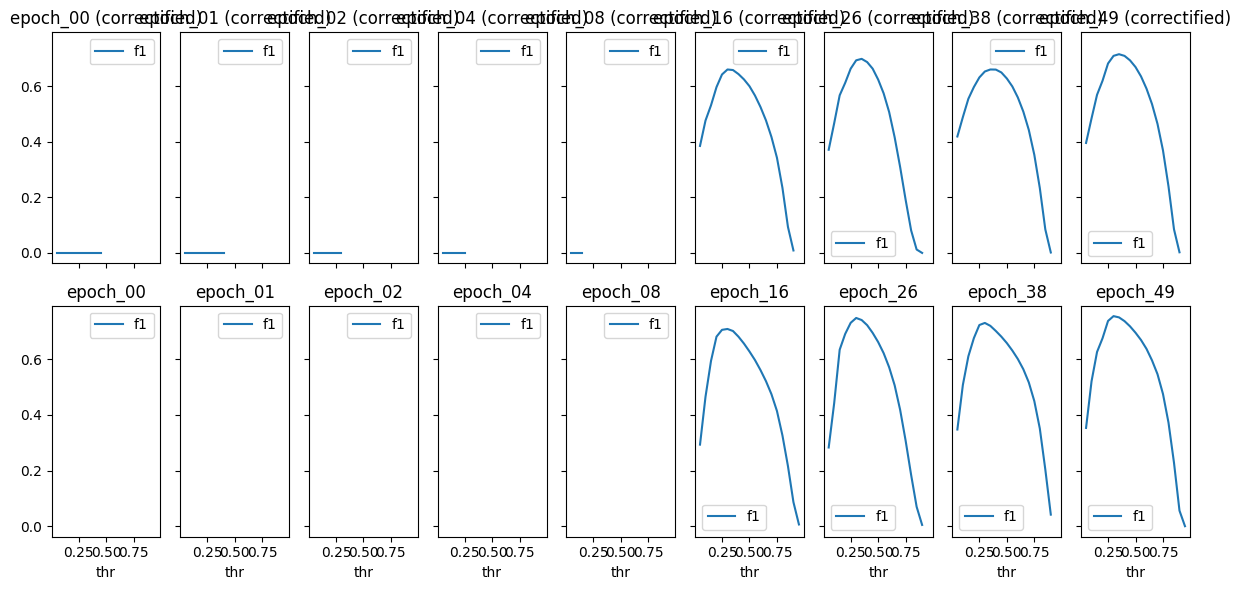

In [49]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

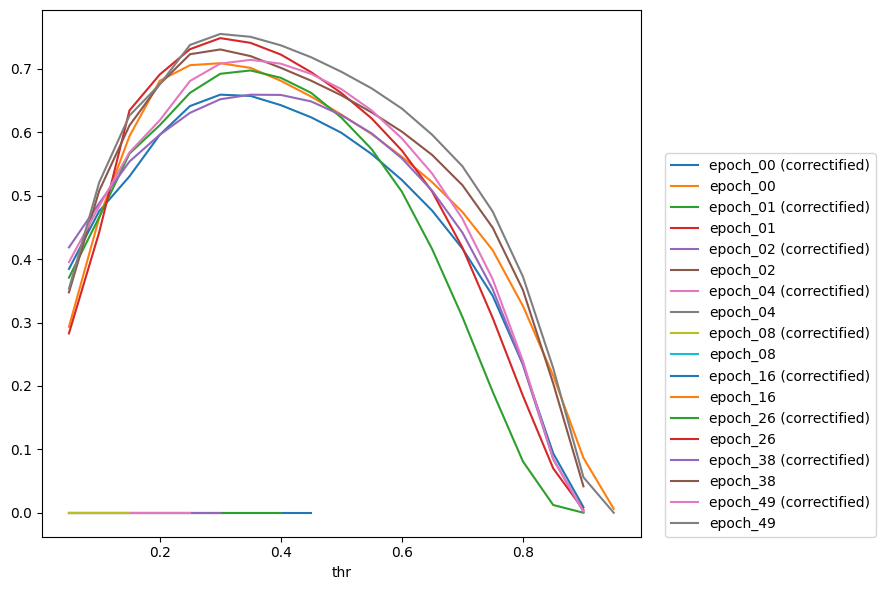

In [50]:
_, axs = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{run}{' (correctified)' if correctify else ''}']
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

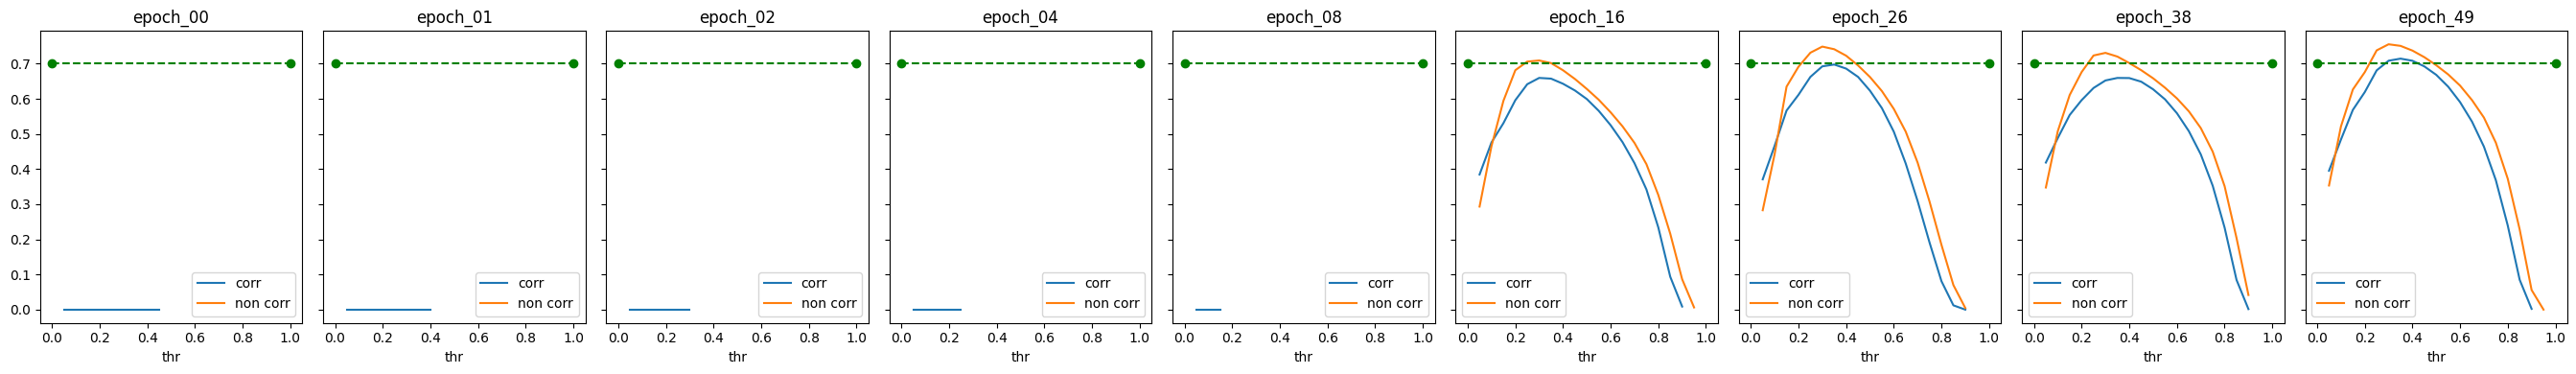

In [51]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.7]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()